In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.11.0'

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [4]:
## Data Augumentation - Creating more data from existing data

In [5]:
batch_size=16

training_datagenarator= ImageDataGenerator(rescale=1./255,horizontal_flip=True,
    vertical_flip=True,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2,validation_split=0.1)

In [6]:
train=training_datagenarator.flow_from_directory('D:\TrainingDataset',
                                                target_size=(224, 224),color_mode='rgb',
                                       class_mode='binary', batch_size=batch_size,subset='training')

validation=training_datagenarator.flow_from_directory('D:\TrainingDataset',
                                                target_size=(224, 224),color_mode='rgb',
                                       class_mode='binary', batch_size=batch_size,subset='validation')

Found 12360 images belonging to 2 classes.
Found 1373 images belonging to 2 classes.


In [7]:
## developing CNN model

In [8]:
cnn=tf.keras.models.Sequential()

# adding first layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding second layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding third layer
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

# Fully connected layer
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

# Output layers
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [9]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 256)       147712    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 256)      0

In [10]:
## train and compile

In [11]:
checkpoint=tf.keras.callbacks.ModelCheckpoint(r"D:\models\fire_and_smoke_model.h5",
                                             monitor="val_loss",mode="min",
                                             save_best_only=True)
callbacks=checkpoint

In [12]:
cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

cnn.fit(train,validation_data=validation,epochs=1,
                  steps_per_epoch=train.samples//batch_size,
                  validation_steps=validation.samples//batch_size,
                  callbacks=callbacks 
                 )

772/772 [==============================] - 1734s 2s/step - loss: 0.0944 - accuracy: 0.9823 - val_loss: 0.0503 - val_accuracy: 0.9868


In [20]:
from tensorflow.keras.models import load_model
cnn=load_model(r"D:\models\fire_and_smoke_model.h5")

In [21]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 256)       147712    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 256)      0

In [22]:
## Test it

In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [24]:
import playsound
import threading
import cv2

In [25]:
def play_sound():
    playsound.playsound('alarm-sound.mp3',True) # to play alarm # mp3 audio file is also provided with the code.
    print("Fire alarm end")

In [39]:
Fire_Reported = 0
def video_frames(video1):
    vid = cv2.VideoCapture(video1)
    while True:
        ret, frame = vid.read()
        if not ret:
            break

        frame = cv2.resize(frame, (960, 540))

        blur = cv2.GaussianBlur(frame, (21, 21), 0)
        hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)

        lower = [18, 50, 50]
        upper = [35, 255, 255]
        lower = np.array(lower, dtype="uint8")
        upper = np.array(upper, dtype="uint8")

        mask = cv2.inRange(hsv, lower, upper)

        output = cv2.bitwise_and(frame, hsv, mask=mask)

        no_red = cv2.countNonZero(mask)

        if int(no_red) > 15000:
            Fire_Reported = Fire_Reported + 1

        cv2.imshow("output", output)

        if Fire_Reported >= 1:
 
            if Alarm_Status == False:
                 threading.Thread(target=play_sound).start()
                 Alarm_Status = True


        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cv2.destroyAllWindows()
    vid.release()
       
    

In [40]:

def testing(video_test):
    frames_for_testing = []
    for x in video_frames(video_test):
        frames_for_testing.append(x)
    
    testing_frames = frames_for_testing

In [41]:
image_show = testing("flame.mp4")


UnboundLocalError: local variable 'Fire_Reported' referenced before assignment

In [ ]:
test_image=image.load_img(testing.testing_frames,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=(cnn.predict(test_image) > 0.5).astype("int32")
# classes_x = np.argmax(result,axis=-1)

Catagories=['Fire',"Smoke"]

1/1 [==============================] - 0s 237ms/step


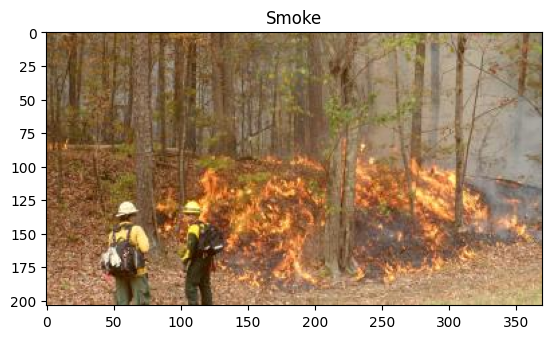

In [22]:
# test_image=image.load_img(image_for_testing,target_size=(224,224))
# test_image=image.img_to_array(test_image)
# test_image=test_image/255
# test_image=np.expand_dims(test_image,axis=0)
# result=(cnn.predict(test_image) > 0.5).astype("int32")
# # classes_x = np.argmax(result,axis=-1)

# Catagories=['Fire',"Smoke"]

# image_show=PIL.Image.open(image_for_testing)
plt.imshow(image_show)

plt.title(Catagories[int(result[0][0])])
plt.show()